<img src="https://pbs.twimg.com/profile_images/1523691369763684357/FPimkdzj_400x400.jpg" align="right" style="float" width="200">
<font color="#0096d2"><h1 align="left">Datamecum: Programa técnico intensivo en data science.</h1></font>
<font color="#00628a"><h2 align="left">Módulo No supervisado</h2></font>
<font color="#00628a"><h2 align="left">Clustering</h2></font>

**Vamos ahora a ver un ejemplo que nos permita estimar de forma quantitativa el número idoneo de clusters**

In [1]:
!pip install kneed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [3]:
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from kneed import KneeLocator
from sklearn.metrics import v_measure_score

Lo primero que hacemos es generarnos un conjunto de datos sintéticos. Para ello utilizamos la función make_moons, generando 500 muestras. Incluimos que tenga algo de ruido (para generar unos pocos puntos que se salgan algo de las distribuciones de los grupos)

In [4]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

X1        X2
0  0.548020  0.820492
1  0.343758 -0.171766
0  1.043427  0.072552
0 -0.835506  0.610872
0 -1.103306 -0.226038

Visualizamos los datos:

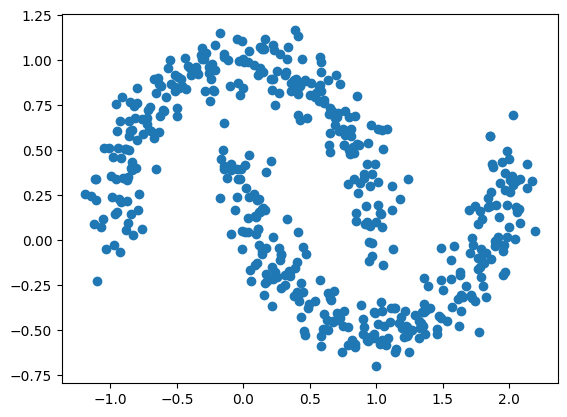

In [5]:
plt.scatter(df['X1'], df['X2'])


### ¿Cómo determinar el valor ideal de epsilon?

Para calcular el valor ideal de epsilon vamos a utilizar el algoritmo de los KNN

In [6]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

Calculamos la distancia y los índices a los 11 elementos más cercanos a cada uno de ellos:

In [13]:
distances, indices = neighbors.kneighbors(df)

Podemos ver los índices del primer registro a los 11 más cercanos:

In [14]:
indices[0]

array([  0, 431, 358, 214, 437, 306, 127, 144,   7, 267, 386])

Podemos ver las distancias del primer elemento a los 11 más cercanos:

In [15]:
distances[0]

array([0.        , 0.02394284, 0.03661475, 0.03838245, 0.05061891,
       0.05199394, 0.05281566, 0.06753769, 0.07402286, 0.08216767,
       0.10879128])

In [16]:
distances[10]

array([0.        , 0.01909919, 0.01965849, 0.02628511, 0.02860301,
       0.0622818 , 0.06389197, 0.06416098, 0.06822216, 0.07772938,
       0.07802326])

Seleccionamos de cada elemento la distancia al elemento número 10 (es decir, a los 11 elementos más alejados. Recordemos que python comienza en 0)

In [18]:
distances = np.sort(distances[:,10], axis = 0)

In [19]:
distances

array([0.0741519 , 0.07664791, 0.07802326, 0.0781772 , 0.08191853,
       0.08216767, 0.0827059 , 0.08368022, 0.08406857, 0.08410857,
       0.08481448, 0.08509267, 0.08575299, 0.08575299, 0.08630183,
       0.08632332, 0.08637392, 0.08641858, 0.08704234, 0.08719445,
       0.08730177, 0.08915326, 0.0893997 , 0.0893997 , 0.08943063,
       0.09001047, 0.09037085, 0.09037408, 0.09054663, 0.09073781,
       0.09082913, 0.09082913, 0.09111348, 0.09113978, 0.09116159,
       0.09157329, 0.09178259, 0.09180144, 0.09248831, 0.09253359,
       0.09263324, 0.09303193, 0.09307556, 0.09334461, 0.09425497,
       0.09450252, 0.09492877, 0.09514959, 0.09568758, 0.09594569,
       0.09608849, 0.09639159, 0.09653213, 0.09673371, 0.09686434,
       0.09686434, 0.09766918, 0.0982009 , 0.09841674, 0.09841674,
       0.09886575, 0.09905439, 0.0990763 , 0.09912099, 0.09912321,
       0.0991655 , 0.09922454, 0.09927124, 0.09939826, 0.09975886,
       0.09978729, 0.10003336, 0.10025523, 0.10025523, 0.10105

A continuación visualizamos el valor de las distancias a los k vecinos más cercanos:

Text(0, 0.5, 'Distances')

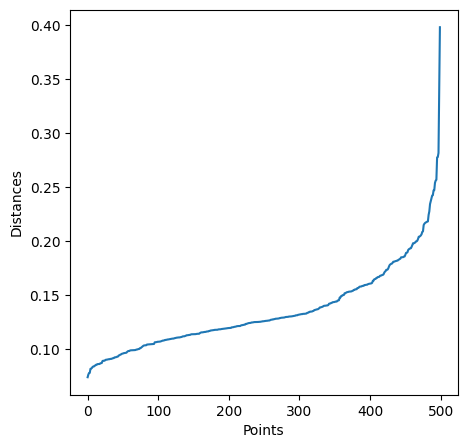

In [22]:
fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distances')

La función KNeeLocator permite encontrar el codo de la curva, seleccionando el valor de la distancia para ese punto:

0.18138320353840326


<Figure size 500x500 with 0 Axes>

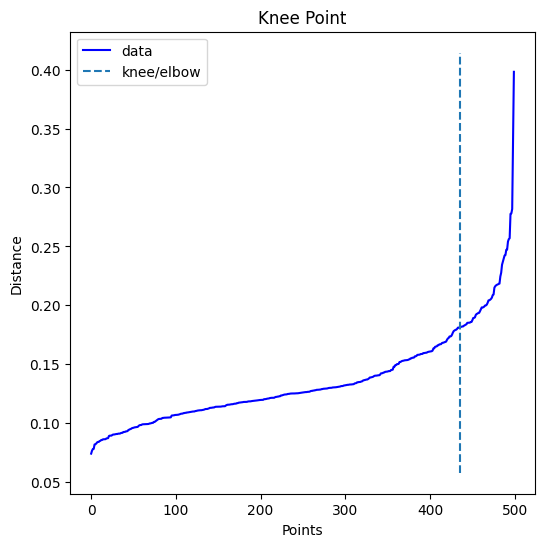

In [23]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Generamos el algoritmo DBSCAN para el valor de epsilon obtenido y el número de muestras indicadas en KNN:

In [24]:
dbscan = DBSCAN(eps = 0.18, min_samples = 11)
dbscan.fit(X)

DBSCAN(eps=0.18, min_samples=11)

In [25]:
etiquetas = dbscan.labels_

Visualizamos los resultados:

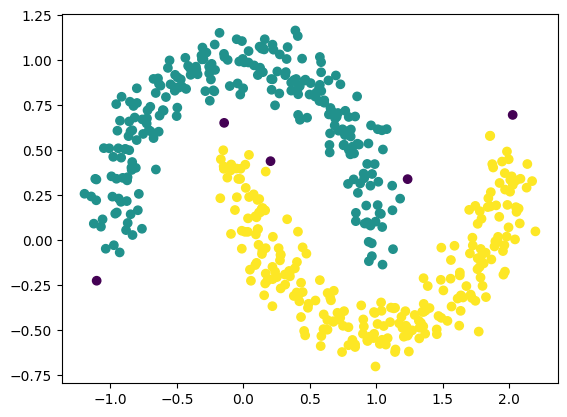

In [26]:
# Visualizing DBSCAN

plt.scatter(df['X1'], df['X2'], c = etiquetas)

Las muestras indicadas como "ruido" son detectadas por el algoritmo como outliers. Podemos determinar cuántas ha detectado nuestro algoritmo.

Esto es muy interesante puesto que DBSCAN es un algoritmo capaz de detectar anomalías en los datos.

In [ ]:
# Identify Noise

